# ![image.png](Resume-Ranking.jpg)


# Resume Ranking System App 

# 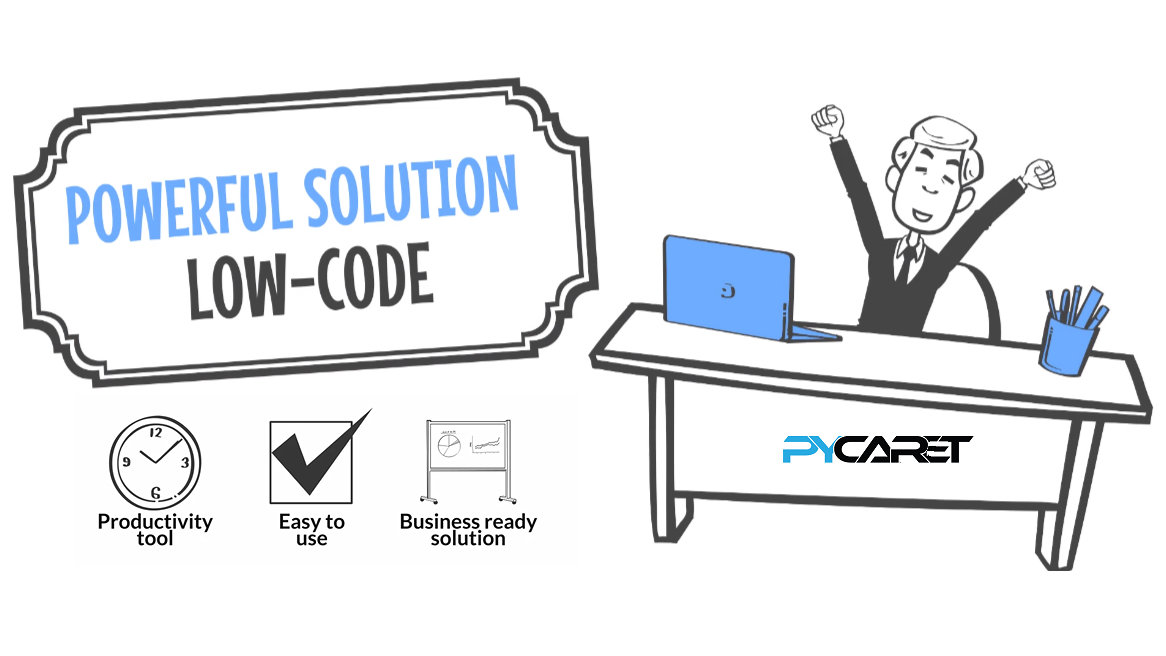

## PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

In [1]:
!pip install pycaret
!pip install sklearn

  Using cached numpy-1.23.5-cp39-cp39-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached numpy-1.21.6-cp39-cp39-macosx_10_9_x86_64.whl (17.0 MB)


  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
ydata-profiling 4.1.2 requires tqdm<4.65,>=4.48.2, but you have tqdm 4.65.0 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=4776c4d4bce841bea51729bb2c45793849bafbc395b6872f24fa3214960b272d
  Stored in directory: /Users/aditya/Library/Caches/pip/wheels/36/49/c9/2374f1dee1b599effabf63d948635e6608

In [1]:
import pandas as pd
from pycaret.datasets import get_data

## Getting the Data

In [117]:
can_data = pd.read_csv('linkedin-data.csv', encoding='ISO-8859-1')

In [118]:
can_data.head()

,Person,class,profile,About,institution_name,position_title,duration,from_to_date,description,location,college_name,degree,edu_from_yr,edu_to_yr,edu_description,duration2,job_description
0,Mukesh kumar,1,Business Dev,A visionary and results oriented business lea...,Daniel Wellington Managing Director Store Bus...,,,,,,Himachal Pradesh UniversityHimachal Pradesh U...,Bachelor of Arts BA Art History Criticism and...,Mar2005 None,Mar2008 None,,0,Business Development Manager\nALLEGIENT UNIFIE...
1,Arvind Verma,1,Business Dev,A competent professional with over 18 years o...,adidas Home Store India Ltd Home Solutions Re...,Area Manager Store Manager Manager Lifestyle ...,2 yrs 1 mo 2 yrs 3 mos 7 mos 4 yrs 2 mos,( Jun 2008 Jun 2010 ) ( Apr 2006 Jun 2008 ) (...,Worked as Area manager at Gurgaon and Handlin...,Gurgaon India Indore Delhi New Delhi Area Ind...,Institute of integrated learning and manageme...,PGDBM MarketingPGDBM Marketing Diploma in Com...,1999 1998 1995,2001 1999 1998,,109,Business Development Manager\nALLEGIENT UNIFIE...
2,Sampat Yadav,1,Business Dev,Professional Business Developer with more tha...,Me N Moms Pvt Ltd Full time,Business Development Manager,2 yrs,( Aug 2020 Jul 2022 ),Sales Business Development Franchise Developm...,New Delhi Delhi India,Savitribai Phule Pune UniversitySavitribai Ph...,Master of Business Administration MBA Marketi...,Jul2014 2011,Jun2016 2013,Grade A Grade A,24,Business Development Manager\nALLEGIENT UNIFIE...
3,Nasib Singh,1,Business Dev,A keen planner strategist in managing busines...,3 yrs 5 mos 4 yrs 2 mos Jai Beverages Pvt Ltd,G4S G4S General Manager,None None 1 yr 8 mos,( New Delhi India ) ( New Delhi India ) ( Nov...,Franchise of PepsicoFranchise of Pepsico,Jammu Area India,University of JammuUniversity of Jammu Univer...,Master s degree in English Literature English...,1974 1971 1964,1976 1974 1971,Activities and societies Head of Dramatics So...,20,Business Development Manager\nALLEGIENT UNIFIE...
4,Jay Sampat,1,Business Dev,Experienced Media Entertainment(M E) Business...,EY Balaji Telefilms Ltd,Director EY India Head Business Development M...,8 yrs 6 mos 1 yr 5 mos,( Jan 2015 Present ) ( Jul 2013 Nov 2014 ),Director EY India Head Business Development M...,Mumbai Area India Mumbai Area India,None,None,None,None,None,119,Business Development Manager\nALLEGIENT UNIFIE...


In [119]:
#check the shape of data
can_data.shape

(128, 17)

In [121]:
data = can_data.sample(frac=0.80, random_state=42).reset_index(drop=True)
data_unseen = can_data.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (102, 17)
Unseen Data For Predictions: (26, 17)


In [122]:
data_unseen.to_csv('unseen_data.csv')

## Setting up Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment.

In [123]:
from pycaret.clustering import *
cust_exp = setup(data = data)

,Description,Value
0,Session id,4419
1,Original data shape,"(102, 17)"
2,Transformed data shape,"(102, 1119)"
3,Numeric features,2
4,Categorical features,15
5,Rows with missing values,2.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode






Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

Missing Values : When there are missing values in original data this will show as True. Notice that Missing Values in the information grid above is True as the data contains missing values which are automatically imputed using mean for numeric features and constant for categorical features. The method of imputation can be changed using the numeric_imputation and categorical_imputation parameters in setup().

Original Data : Displays the original shape of dataset. In this experiment (505, 4) means 505 samples and 4 features.

Transformed Data : Displays the shape of the transformed dataset. The number of features can increase due to encoding of categorical features in the dataset if there is any.

Numeric Features : The number of features inferred as numeric. 

Categorical Features : The number of features inferred as categorical. 

## Create a Model

In [124]:
kmeans = create_model('kmeans',4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6412,398.2111,0.3763,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [126]:
print(kmeans)

KMeans(n_clusters=4, random_state=4419)


## Assign a Model

Now that we have created a model, we would like to assign the cluster labels to our dataset to analyze the results. We will achieve this by using the assign_model() function.

In [127]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Person,class,profile,About,institution_name,position_title,duration,from_to_date,description,location,college_name,degree,edu_from_yr,edu_to_yr,edu_description,duration2,job_description,Cluster
0,Rishabh Saxena,2,data scientist,Experienced Data Scientist with a demonstrate...,Nagarro IBM,Internship Trainee,3 mos,( Jun 2018 Aug 2018 ),,,Birla Institute of Technology and Science Pil...,Master of Technology MTech Data Science and E...,Apr2021 2015,Apr2023 2019,Grade 8 2Grade 8 2 Skills Data Science Deep R...,3,Data Scientist Associate II\nJP Morgan Chase &...,Cluster 1
1,Harsh Sharma,2,data scientist,Passionate to make machines intelligentPassio...,Akaike Technologies Tata Consultancy Services,Data Scientist Software Developer,1 yr 10 mos 1 yr 5 mos,( May 2019 Feb 2021 ) ( Dec 2017 Apr 2019 ),Computer Vision Projects that I have worked o...,Bengaluru Area India,Guru Gobind Singh Indraprastha UniversityGuru...,B Tech in ECEB Tech in ECE,2013,2017,Activities and societies Worked as a Team Lea...,39,Data Scientist Associate II\nJP Morgan Chase &...,Cluster 1
2,Salil Trehan,2,data scientist,Triggered by a brief intro of ML during my ma...,DRDO Ministry of Defence Govt of India Full t...,Data Scientist Research Analyst Digital Marke...,5 mos 4 mos 6 mos 3 mos 1 yr 3 mos 3 mos,( Feb 2023 Present ) ( May 2019 Aug 2019 ) ( ...,helped me get this jobLinkedIn helped me get ...,Delhi India On site Gurgaon Haryana India New...,ScalerScaler Great Lakes Institute of Managem...,Data Science Machine Learning (Specialization...,Oct2022 Aug2019 2017 2012,Mar2024 Feb2020 2019 2017,Course Covered MySQL Google Bigquery (Sanbox)...,36,Data Scientist Associate II\nJP Morgan Chase &...,Cluster 1
3,Vatsal Gupta,2,data scientist,A omplished Data Scientist and Machine Learni...,Peak India Senior Data Scientist GS Lab,Senior Data Scientist Data Scientist Data Sci...,6 mos 1 yr 4 mos 2 yrs 1 mo 11 mos,( Jan 2023 Present ) ( Sep 2021 Dec 2022 ) ( ...,Skills Problem Solving Teamwork Statistical M...,Pune Maharashtra India Pune Maharashtra India,Lovely Professional UniversityLovely Professi...,Bachelors Computer ScienceBachelors Computer ...,2015 2014 2012,2019 2015 2013,Grade 8 71Grade 8 71 Activities and societies...,58,Data Scientist Associate II\nJP Morgan Chase &...,Cluster 0
4,Jay Kumar,4,analytics consultant,I have skills in Analytics Machine Learning a...,Trendwise Analytics Independent Information T...,Data Scientist Intern Project Management Proj...,7 mos 2 yrs 2 mos 7 yrs 6 mos,( Feb 2015 Aug 2015 ) ( Dec 2012 Jan 2015 ) (...,Designing and implementing statistical analys...,Bengaluru Area India Bengaluru Area India Ben...,Nagpur UniversityNagpur University Vikas Vidy...,BE Electronics and PowerBE Electronics and Po...,None None,None None,,123,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 0


In [128]:
kmean_results.max()

class                4
duration2          506
Cluster      Cluster 3
dtype: object

In [129]:
kmean_results[kmean_results['Cluster'] == 'Cluster 0']

,Person,class,profile,About,institution_name,position_title,duration,from_to_date,description,location,college_name,degree,edu_from_yr,edu_to_yr,edu_description,duration2,job_description,Cluster
3,Vatsal Gupta,2,data scientist,A omplished Data Scientist and Machine Learni...,Peak India Senior Data Scientist GS Lab,Senior Data Scientist Data Scientist Data Sci...,6 mos 1 yr 4 mos 2 yrs 1 mo 11 mos,( Jan 2023 Present ) ( Sep 2021 Dec 2022 ) ( ...,Skills Problem Solving Teamwork Statistical M...,Pune Maharashtra India Pune Maharashtra India,Lovely Professional UniversityLovely Professi...,Bachelors Computer ScienceBachelors Computer ...,2015 2014 2012,2019 2015 2013,Grade 8 71Grade 8 71 Activities and societies...,58,Data Scientist Associate II\nJP Morgan Chase &...,Cluster 0
4,Jay Kumar,4,analytics consultant,I have skills in Analytics Machine Learning a...,Trendwise Analytics Independent Information T...,Data Scientist Intern Project Management Proj...,7 mos 2 yrs 2 mos 7 yrs 6 mos,( Feb 2015 Aug 2015 ) ( Dec 2012 Jan 2015 ) (...,Designing and implementing statistical analys...,Bengaluru Area India Bengaluru Area India Ben...,Nagpur UniversityNagpur University Vikas Vidy...,BE Electronics and PowerBE Electronics and Po...,None None,None None,,123,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 0
6,Vijendra Katiyar,3,manager,With 16 years of industry experience I am cur...,Trend Micro Indusface Jainam Technologies,Manager Sales (Enterprise) Consultant,1 yr 1 mo 5 yrs 4 mos,( Sep 2011 Sep 2012 ) ( Jun 2006 Sep 2011 ),Currently handling west region for direct sal...,Mumbai Area India,Indian School of BusinessIndian School of Bus...,Training Stepping in Sales LeadershipTraining...,2014 2008 2002,2014 2009 2006,Grade AGrade A Activities and societies Event...,77,"Product Manager\nNetApp\nBangalore, Karnataka,...",Cluster 0
7,Jawaad Turey,4,analytics consultant,Experienced Decision Sciences Consultant with...,Decision Analytics Consultant Decision Resour...,Lead Analyst Senior Analyst Analyst Trainee D...,1 yr 4 mos 1 yr 8 mos 1 yr 5 mos 2 yrs 1 mo,( Oct 2019 Jan 2021 ) ( Mar 2018 Oct 2019 ) (...,Led a team of 5 analysts on projects across t...,Gurgaon India Bangalore,Dayananda Sagar College Of Engineering Bangal...,Bachelor s degree Electrical Electronics and ...,2010 2008 2001,2014 2010 2008,Activities and societies Served as a placemen...,78,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 0
11,Prosenjit Biswas,2,data scientist,Data Scientist with 9 plus years of experienc...,Sony Research India Full time ABB Full time D...,Research Scientist Senior Data Scientist Asso...,2 yrs 6 mos 1 yr 5 mos 1 yr 3 mos 2 yrs 2 mos...,( Jan 2021 Present ) ( Sep 2019 Jan 2021 ) ( ...,System Anomaly Detection In power plants unfo...,Bengaluru Area India Bengaluru Area India Ben...,Georgia Institute of TechnologyGeorgia Instit...,OMS CS Computer ScienceOMS CS Computer Scienc...,Jan2022 2008 2006 2005,Sep2024 2012 2008 2006,Grade 7 95 DGPAGrade 7 95 DGPA Activities and...,122,Data Scientist Associate II\nJP Morgan Chase &...,Cluster 0
12,Sameer Mahapatra,3,manager,A senior business leader with 20 years global...,Vodafone Idea Limited Vodafone Reliance Commu...,Vice President and National Business Developm...,2 yrs 1 mo 3 yrs 2 mos 2 yrs 8 mos,( Jun 2017 Jun 2019 ) ( Apr 2014 May 2017 ) (...,Responsible for building and driving the Broa...,Mumbai Area India Corporate Office Mumbai,Indian Institute of Management CalcuttaIndian...,Executive program in leadership managementExe...,2014 1997,2015 1999,,95,"Product Manager\nNetApp\nBangalore, Karnataka,...",Cluster 0
13,Jay Sampat,1,Business Dev,Experienced Media Entertainment(M E) Business...,EY Balaji Telefilms Ltd,Director EY India Head Business Development M...,8 yrs 6 mos 1 yr 5 mos,( Jan 2015 Present ) ( Jul 2013 Nov 2014 ),Director EY India Head Business Development M...,Mumbai Area India Mumbai Area India,None,None,None,None,None,119,Business Development Manager\nALLEGIENT UN

## Plot a Model

In [130]:
plot_model(kmeans)

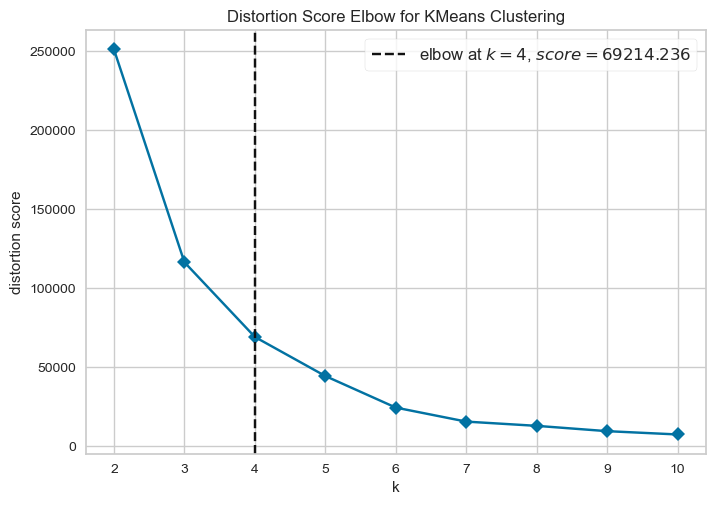

In [131]:
plot_model(kmeans,plot = 'elbow')

In [132]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [134]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.to_csv("prediction_result_test.csv",index=False)

## Predict on unseen data

The predict_model() function is used to assign cluster labels to a new unseen dataset. We will now use our kmeans model to predict the data stored in data_unseen. This variable was created at the beginning of the tutorial and contains 54 samples from the original dataset that were never exposed to PyCaret.

In [135]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
#unseen_predictions.head()

## Saving the model

In [136]:
save_model(kmeans,'Final Kmeans Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/h9/b9hqt5sd69gc_yd08sw3y6tr0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['class', 'duration2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Person', 'profile', 'About',
                                              'institution_name',
                                              'position_title', 'duration',
                                              'from_to_date', 'descripti...
                                              'job_description'],
                                     transformer=OneHotEncoder(cols=['Person',
                                                                     'profile',
                                                                     'About',
                                                                     'institution_name',
  

## Loading the saved model

In [137]:
saved_kmeans = load_model('Final Kmeans Model')

Transformation Pipeline and Model Successfully Loaded


In [138]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [139]:
new_prediction.head()

,Person,class,profile,About,institution_name,position_title,duration,from_to_date,description,location,college_name,degree,edu_from_yr,edu_to_yr,edu_description,duration2,job_description,Cluster
0,Archit Gupta,4,analytics consultant,An engineer who is very much enthusiastic in ...,Decision Point Analytics Big Growth Digital (...,Operations and Analytics Intern Summer Intern,4 mos 3 mos,( Feb 2020 May 2020 ) ( May 2018 Jul 2018 ),Responsible for Operations Strategy Analytics...,Gurgaon Haryana Tapukara Rajasthan,BML Munjal UniversityBML Munjal University Ar...,Bachelor of Technology BTech Mechanical Engin...,2016 2014,2020 2016,Activities and societies Music Head Performin...,7,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 1
1,Dheeraj Ravi,4,analytics consultant,Business oriented data analyst offering profe...,WPP Full time Assistant Manager Reporting Ass...,Senior Data Analyst,1 yr 10 mos,( Dec 2020 Sep 2022 ),helped me get this jobLinkedIn helped me get ...,Gurugram Haryana India,Mahatma Gandhi UniversityMahatma Gandhi Unive...,Bachelor of Technology BTech Electrical and E...,2013 2011,2017 2013,Grade 7 02Grade 7 02 Grade 12th StdGrade 12th...,22,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 1
2,Jawaad Turey,4,analytics consultant,Experienced Decision Sciences Consultant with...,Decision Analytics Consultant Decision Resour...,Lead Analyst Senior Analyst Analyst Trainee D...,1 yr 4 mos 1 yr 8 mos 1 yr 5 mos 2 yrs 1 mo,( Oct 2019 Jan 2021 ) ( Mar 2018 Oct 2019 ) (...,Led a team of 5 analysts on projects across t...,Gurgaon India Bangalore,Dayananda Sagar College Of Engineering Bangal...,Bachelor s degree Electrical Electronics and ...,2010 2008 2001,2014 2010 2008,Activities and societies Served as a placemen...,78,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 0
3,Sagar Mehta,4,analytics consultant,Data Analyst BI Developer with 6 Year of Work...,EXL HCL Technologies Full time Tata Consultan...,Business Intelligence Analyst Data Analyst Ta...,1 yr 3 yrs 11 mos,( May 2020 Apr 2021 ) ( Jun 2016 Apr 2020 ),uf0d8 tWorked in Presales solution team of ME...,Noida Uttar Pradesh India Pune Maharashtra,Vellore Institute of TechnologyVellore Instit...,Engineer s Degree Civil EngineeringEngineer s...,2012,2016,Grade 8 29 10Grade 8 29 10 Activities and soc...,59,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 0
4,Viswanathan G,4,analytics consultant,An IIM Grad with a major in Finance Marketing...,Full time 3 yrs 4 mos Vinculum Group Full tim...,Tiger Analytics Business Analyst Assistant Sy...,1 yr 1 yr,( Apr 2019 Mar 2020 ) ( Jun 2016 May 2017 ),Worked as Business Analyst for an Indonesian ...,Noida Area India Mumbai Area India,Indian Institute of Management KashipurIndian...,PGPPGP Bachelor of Engineering BE Production ...,2017 2012,2019 2016,,24,"Lead Consultant, SC Analytics\nCheerios\nPowai...",Cluster 1


In [42]:
from collections import Counter

In [43]:
lst = list(new_prediction['Cluster'])

In [47]:
counter = Counter(lst)
max_occurrence = max(counter, key=counter.get)
max_occurrence = str(max_occurrence)  # Print the variable with the maximum occurrence

In [49]:
new_prediction['Cluster'] == max_occurrence

0     True
1     True
2     True
3     True
4     True
5    False
Name: Cluster, dtype: bool

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [65]:
data.columns

Index(['Person', 'class', 'profile', 'About', 'institution_name',
       'position_title', 'duration', 'from_to_date', 'description', 'location',
       'college_name', 'degree', 'edu_from_yr', 'edu_to_yr', 'edu_description',
       'duration2', 'job_description'],
      dtype='object')

In [76]:
job_description_class1 = '''
"Business Development Manager
ALLEGIENT UNIFIED TECHNOLOGY PRIVATE LIMITED
New Delhi, Delhi, India
May 20, 2023

We are looking for young, enthusiastic people for our Business Development team for Cloud & Software Business

Roles and Responsibilities

Should be able to identify new customer segments and build relationship with prospects.
Should be able to generate prospects by cold calling, mass mailing or with the help of other social media platforms or software's/tools.
Understand customer needs and requirements and pitch services as well as physical meeting with prospects.
Research accounts, identify key players and generate interest.
Maintaining client relationship, performing other assigned BD related tasks.
Generating lead and giving demos,
End to End sales

Desired Candidate Profile
Industry- Any but IT (Software, Cloud Services, Subscription) industry is preferred.

First preference would be given to cloud sales or subscription sales experienced candidates.

Qualification-
Minimum BBA/B.Com/B.Sc (computer science)
Required Experience - minimum 2-7 years of experience in end-customer selling for IT solutions (Single product sales not required)
Salary Package- 4-6 LPA (no bar for the right fit)
Working Days- 6
Shift- General (9:30 AM- 6.00 PM)

Job Location- Head Office (Patel Nagar, New Delhi)

What are the qualities we are looking for?

Proven business development experience with basic knowledge about cloud computing with good communication skills
Strong phone presence
Self-motivated, fast learner and passion for sales
Strong listening and presentation skills
Ability to multi-task, prioritize, and manage time effectively.

Email Id -
Mob. -
Company websites-

For more information about us please visit our company websites (Allegient Unified Technologies Private Limited)
(Customer Success Technology Pvt Ltd)"

'''

In [77]:
tfidf_vectorizer = TfidfVectorizer()

skills_tfidf = tfidf_vectorizer.fit_transform(data['description'])


jd_tfidf = tfidf_vectorizer.transform([job_description_class1])


cosine_similarities = cosine_similarity(jd_tfidf, skills_tfidf).flatten()

data['cosine_similarity_class_1'] = cosine_similarities

In [104]:
data['job_description'][0]

"Data Scientist Associate II\nJP Morgan Chase & Co.\nMumbai, Maharashtra, India\nJune 09, 2023\n\nYou're ready to gain the skills and experience needed to grow within your role and advance your career\nJob Summary\nOur professionals in our Corporate Functions cover a diverse range of areas from finance and risk to human resources and marketing. Our corporate teams are an essential part of our company, ensuring that we're setting our businesses, clients, customers and employees up for success.\nJob responsibilities:\nBuild and train production grade ML models on large-scale datasets to solve business use cases\nUse large scale data processing frameworks to manipulate and extract value from both structured and un-structured data.\nUse Deep Learning models like NLP for solving various business use cases involving forecasting and anomaly detection.\nPerform data modeling experiments, evaluating against strong baselines, and extracting key statistical insights and/or cause and effect relati